Dataset shape: (14, 43)


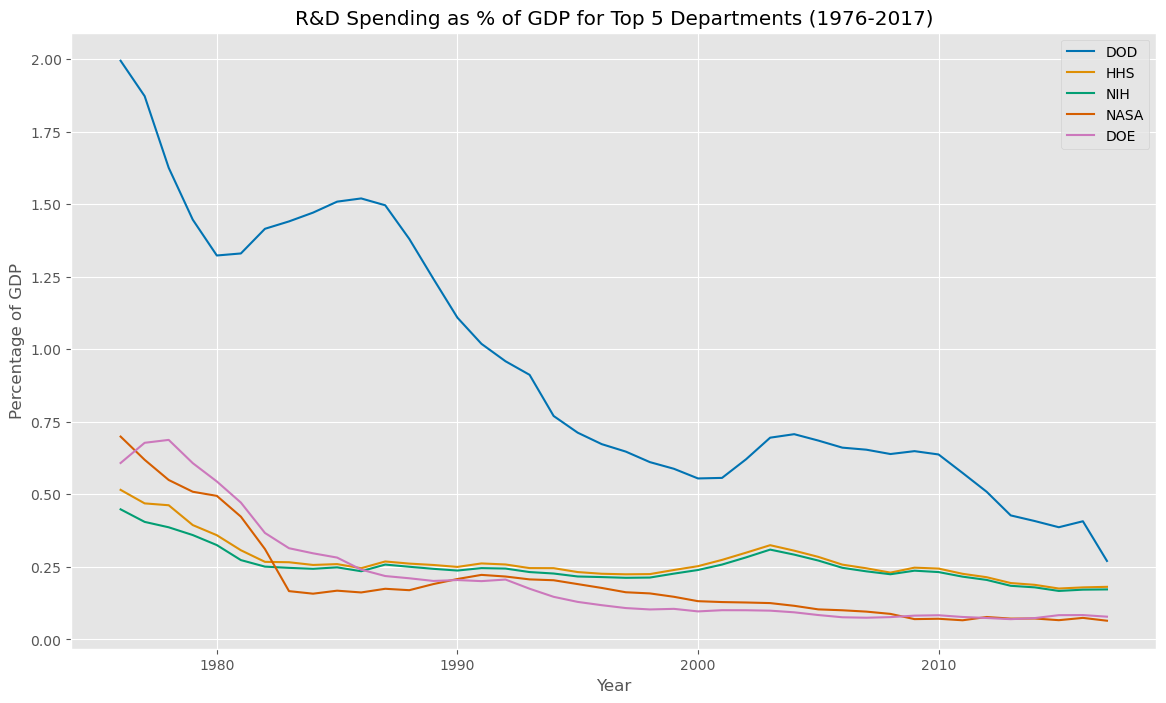

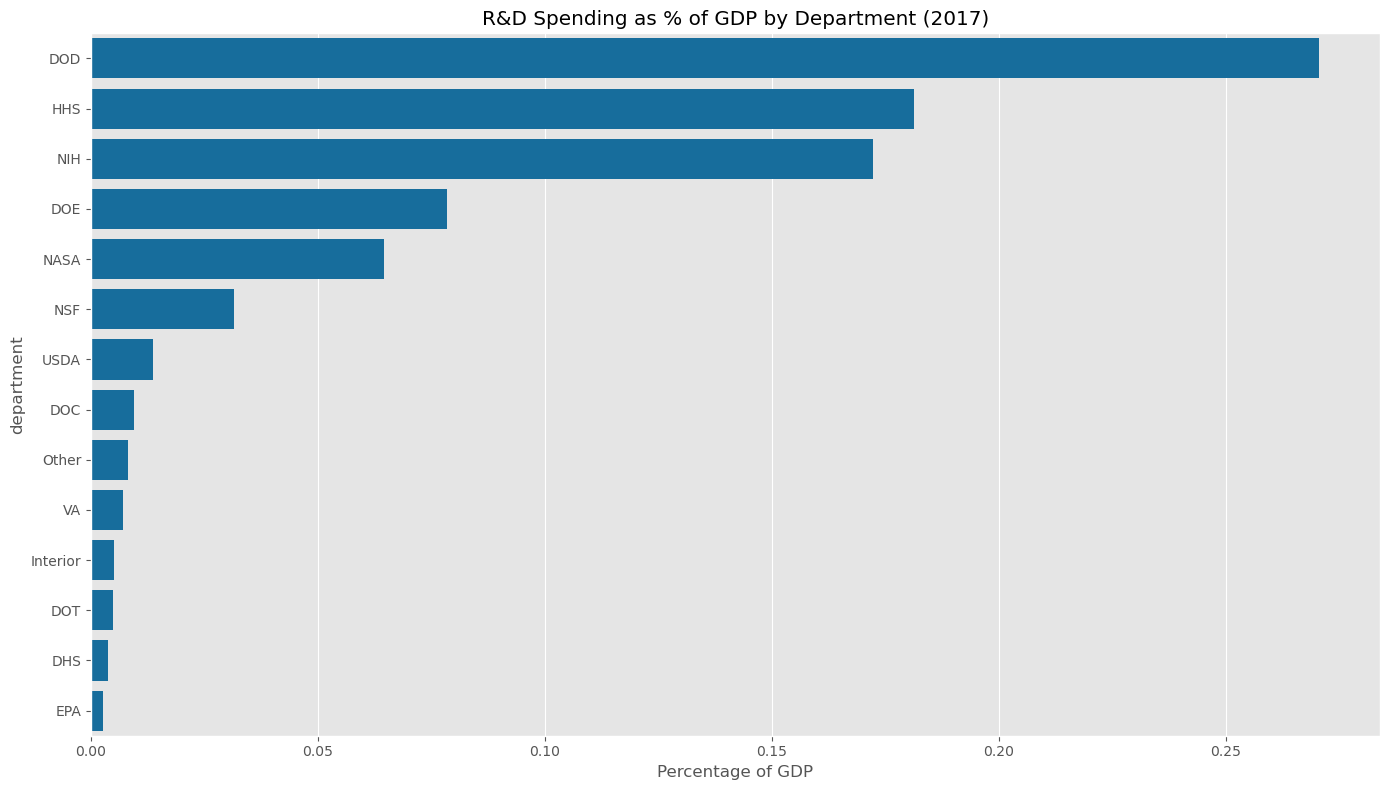

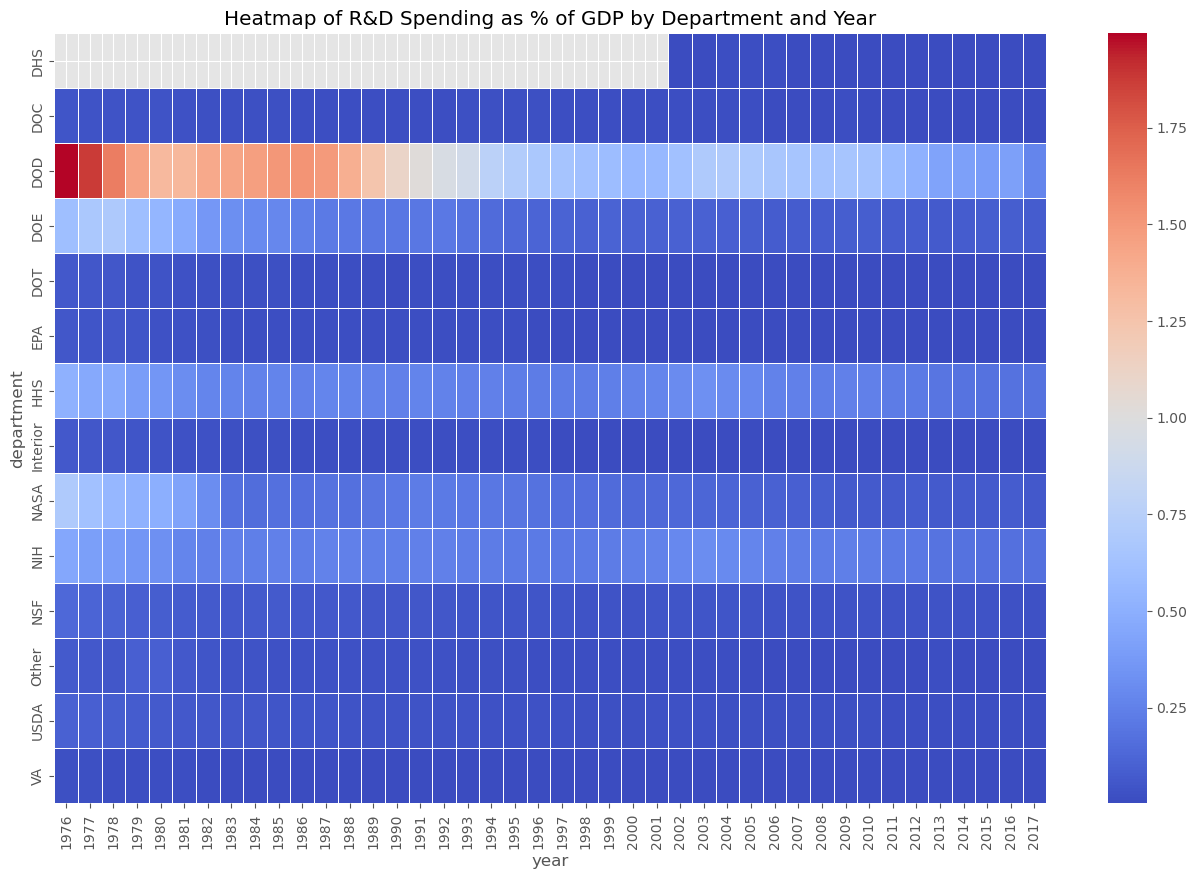

department
DOD         0.931092
HHS         0.269553
NIH         0.251655
DOE         0.207941
NASA        0.198547
NSF         0.054083
USDA        0.036455
Other       0.025885
DOC         0.017452
Interior    0.016046
Name: pct_of_gdp, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

plt.style.use('ggplot')
sns.set_palette("colorblind")

df = pd.read_csv('fed_rd_year&gdp.csv')

print(f"Dataset shape: {df.shape}")
df.head()

# Data Cleaning and Tidying
# Converting from wide to long format using melt; Each row will represent a single observation with year and GDP information
id_vars = ['department']
value_vars = [col for col in df.columns if col != 'department']

melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, 
                   var_name='year_gdp', value_name='spending')

# Extracting year and GDP using regex; Column names contain embedded year and GDP values
melted_df['year'] = melted_df['year_gdp'].str.extract(r'(\d{4})').astype(int)
melted_df['gdp'] = melted_df['year_gdp'].str.extract(r'gdp(\d+\.*\d*)').astype(float)

# Calculating  percentage of GDP spent on R&D
melted_df['pct_of_gdp'] = (melted_df['spending'] / melted_df['gdp']) * 100

# Finalizing the tidy dataframe
tidy_df = melted_df[['department', 'year', 'spending', 'gdp', 'pct_of_gdp']]
tidy_df.head()

# Data Visualizations A, B and C
# A: Spending trends over time for top fiv departments
top_depts = tidy_df.groupby('department')['spending'].sum().nlargest(5).index
plt.figure(figsize=(14, 8))
for dept in top_depts:
    dept_data = tidy_df[tidy_df['department'] == dept]
    plt.plot(dept_data['year'], dept_data['pct_of_gdp'], label=dept)
    
plt.title('R&D Spending as % of GDP for Top 5 Departments (1976-2017)')
plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.legend()
plt.grid(True)
plt.show()

# B: Department spending comparison for the most recent year
recent_year = tidy_df['year'].max()
recent_data = tidy_df[tidy_df['year'] == recent_year].sort_values('pct_of_gdp', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='pct_of_gdp', y='department', data=recent_data)
plt.title(f'R&D Spending as % of GDP by Department ({recent_year})')
plt.xlabel('Percentage of GDP')
plt.tight_layout()
plt.show()

# C: Heatmap for R&D spending trends over time
pivot_df = tidy_df.pivot_table(
    values='pct_of_gdp',
    index='department',
    columns='year',
    aggfunc='mean'
)
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of R&D Spending as % of GDP by Department and Year')
plt.show()

# Analyzingg average spending by department
avg_spending = tidy_df.groupby('department')['pct_of_gdp'].mean().sort_values(ascending=False)
print(avg_spending.head(10))
